# Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map

>Benjamin Cooley  
>Jun 25, 2018·  
>6 min read

https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [1]:
import os
os.getcwd()

'/home/jdreed/MSDS696/notebooks'

In [2]:
import plotly.graph_objects as go
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../../LONDON/"
# set the filepath and load in a shapefile
#fp = “datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp”
fp =  data_path + "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

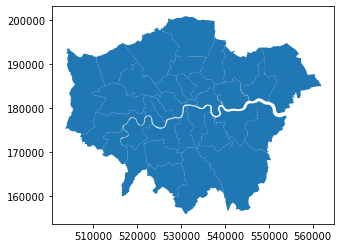

In [3]:
map_df.plot()

In [4]:
fn = '../../LONDON/london-borough-profiles.csv'
df = pd.read_csv(fn)
df.head()
#print(df.columns)
df = df[['Area_name','Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)', 
  'Population_density_(per_hectare)_2017', 'Mortality_rate_from_causes_considered_preventable_2012/14']]

In [5]:
df.head()

,Area_name,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Population_density_(per_hectare)_2017,Mortality_rate_from_causes_considered_preventable_2012/14
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [6]:
data_for_map = df.rename(index=str, columns={'Happiness_score_2011-14_(out_of_10)': 'happiness',
'Anxiety_score_2011-14_(out_of_10)': 'anxiety',
'Population_density_(per_hectare)_2017': 'pop_density_per_hectare',
'Mortality_rate_from_causes_considered_preventable_2012/14': 'mortality'})
# check dat dataframe
data_for_map.head()

,Area_name,happiness,anxiety,pop_density_per_hectare,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


## Merge the two data frames into one

In [7]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(data_for_map.set_index('Area_name'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


In [8]:
merged.columns

Index(['GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry', 'happiness', 'anxiety',
       'pop_density_per_hectare', 'mortality'],
      dtype='object')

## Map Time

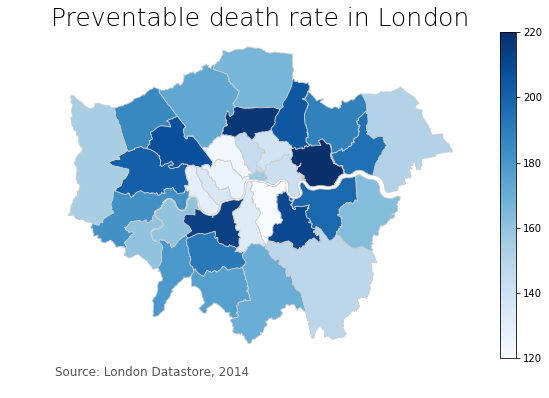

In [15]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop_density_per_hectare'

# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


fig.savefig('map_export.png', dpi=300)